In [73]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt

In [74]:
data= np.loadtxt("data.txt",dtype=float);
data

array([-1.006,  0.386, -1.223, -0.591, -0.345,  0.157,  0.8  , -0.155,
       -0.379, -1.023,  1.306, -0.861,  0.303,  0.518,  0.986,  0.788,
        0.883, -0.098, -0.242,  1.701,  1.199, -1.23 , -0.73 , -1.492,
        0.643, -0.577, -0.224,  0.997, -1.165, -0.494, -2.577,  2.641,
       -1.143, -0.086,  2.919,  0.527,  0.297,  0.434,  0.756,  0.172,
       -2.086, -0.904, -1.413, -0.012, -1.248,  1.671, -0.521, -0.025,
        1.164,  0.354,  0.866, -0.005,  0.403,  1.908,  0.448,  0.169,
       -0.731, -1.189,  0.905,  0.283,  2.431,  1.409,  0.191, -0.165,
        0.889,  0.804, -2.131, -0.754,  1.458,  1.65 ,  0.026,  0.885,
        0.011, -0.99 , -0.104,  0.174, -0.052, -0.182,  1.813,  0.346,
        0.11 ,  1.757, -0.693, -0.732,  1.073, -1.724, -1.81 ,  0.947,
       -1.118,  0.666,  0.97 ,  1.14 , -1.105,  0.894,  1.547, -0.484,
       -0.086, -0.066,  0.15 , -0.264])

<h1>Статиcтический ряд</h1>

In [75]:
print(f"Минимальное значение: {data.min()}")
print(f"максимальное значение: {data.max()}")
h=(data.max()-data.min())/12
h = h.round(1)
print(f"Шаг: {h}")

Минимальное значение: -2.577
максимальное значение: 2.919
Шаг: 0.5


In [76]:
a = -2.59
b = 3.41
count=1
summ1 = 0
summ2=0

df = pd.DataFrame()

data_interval=[]
for i in range(12):
   bound1 = a + i * h
   bound2 = a + (i+1) * h
   bound1 = bound1.round(2)
   bound2=bound2.round(2)
   count_interval = np.count_nonzero((data >= bound1) & (data < bound2))
   summ1+=count_interval
   print(f"Начало: {bound1}, Конец: {bound2}\t Середина: {(bound2-bound1)/2+bound1} \t Частота интервалов:{count_interval}")
   print(f"Относительная частота: {count_interval/100}")
   print("\n")
   summ2+=count_interval/100
   data_interval.append([bound1,bound2,(count_interval/100)/h,(bound2+bound1)/2])
   df[f"{count}"]=[f"({bound1},{bound2})",(bound2+bound1)/2, count_interval,count_interval/100]
   count+=1
df["Примечания"]=["NaN","NaN",summ1,summ2]
df
data_interval

Начало: -2.59, Конец: -2.09	 Середина: -2.34 	 Частота интервалов:2
Относительная частота: 0.02


Начало: -2.09, Конец: -1.59	 Середина: -1.8399999999999999 	 Частота интервалов:3
Относительная частота: 0.03


Начало: -1.59, Конец: -1.09	 Середина: -1.34 	 Частота интервалов:10
Относительная частота: 0.1


Начало: -1.09, Конец: -0.59	 Середина: -0.8400000000000001 	 Частота интервалов:11
Относительная частота: 0.11


Начало: -0.59, Конец: -0.09	 Середина: -0.33999999999999997 	 Частота интервалов:14
Относительная частота: 0.14


Начало: -0.09, Конец: 0.41	 Середина: 0.16 	 Частота интервалов:23
Относительная частота: 0.23


Начало: 0.41, Конец: 0.91	 Середина: 0.6599999999999999 	 Частота интервалов:16
Относительная частота: 0.16


Начало: 0.91, Конец: 1.41	 Середина: 1.16 	 Частота интервалов:10
Относительная частота: 0.1


Начало: 1.41, Конец: 1.91	 Середина: 1.66 	 Частота интервалов:8
Относительная частота: 0.08


Начало: 1.91, Конец: 2.41	 Середина: 2.16 	 Частота интервалов:0
Отн

[[-2.59, -2.09, 0.04, -2.34],
 [-2.09, -1.59, 0.06, -1.8399999999999999],
 [-1.59, -1.09, 0.2, -1.34],
 [-1.09, -0.59, 0.22, -0.8400000000000001],
 [-0.59, -0.09, 0.28, -0.33999999999999997],
 [-0.09, 0.41, 0.46, 0.15999999999999998],
 [0.41, 0.91, 0.32, 0.66],
 [0.91, 1.41, 0.2, 1.16],
 [1.41, 1.91, 0.16, 1.66],
 [1.91, 2.41, 0.0, 2.16],
 [2.41, 2.91, 0.04, 2.66],
 [2.91, 3.41, 0.02, 3.16]]

<h1>Гистограмма</h1>

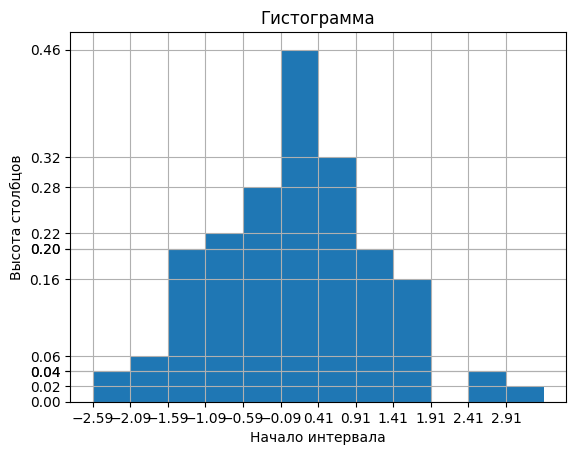

In [77]:
# Извлечение значений для осей x, y и высоты столбцов
x = [interval[0] for interval in data_interval]

heights = [interval[2] for interval in data_interval]

# Построение гистограммы
plt.bar(x, heights, width=h,align='edge')

plt.grid(True)
plt.xticks(x)
plt.yticks(heights)

# Установка подписей осей и заголовка
plt.xlabel('Начало интервала')
plt.ylabel('Высота столбцов')
plt.title('Гистограмма')

# Отображение графика
plt.show()


<h1>Статиcтическая функция распределения<h1>

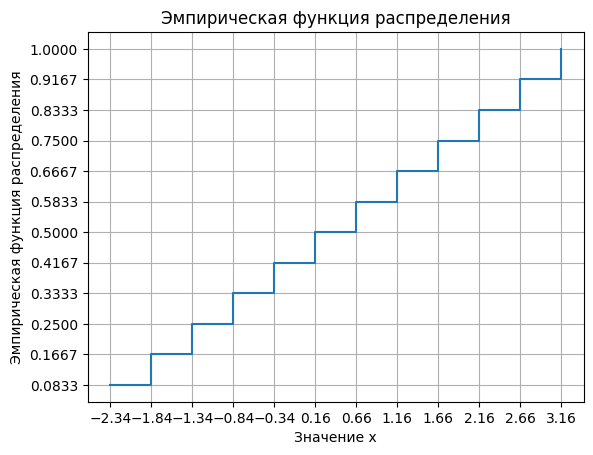

In [78]:
# Извлечение значений, для которых нужно построить ЭФР
x = [interval[3] for interval in data_interval]

# Сортировка значений
x_sorted = np.sort(x)

# Вычисление вероятностей
n = len(x_sorted)
probabilities = np.arange(1, n+1) / n



plt.grid(which='both')
plt.xticks(x)
plt.yticks(probabilities)

# Построение графика
plt.step(x_sorted, probabilities, where='post')

# Установка подписей осей и заголовка
plt.xlabel('Значение x')
plt.ylabel('Эмпирическая функция распределения')
plt.title('Эмпирическая функция распределения')

# Отображение графика
plt.show()

<h1>Точечные оценки математического ожидания и дисперсии</h1>


#### Точечной оценкой математического ожидания является выборочное среднее: $\overline{m}$

In [79]:
M = np.average(data)
print("Точечная оценка мат. ожидания: "+str(M.round(3)))

Точечная оценка мат. ожидания: 0.117


#### Точечная выборочная оценка дисперсии (смещённая): $\={D} =\sum_{i=1}^{12} (x_{i}^2 * p_i^{*}) - \=m^2$

In [80]:
D_bad = sum([x[2]*x[3]**2 for x in data_interval])-M**2 #x[2] это относительные частоты p_{i}^{*}, x[3] это середина интервала
print("Смещённая оценка дисперсии: "+str(D_bad.round(3)))

Смещённая оценка дисперсии: 2.299


#### Точечная несмещённая оценка дисперссии: $\~D = \frac{12}{12-1} \=D$

In [81]:
D = 12/11*D_bad
print("Несмещённая оценка дисперсии: "+str(D.round(3)))

Несмещённая оценка дисперсии: 2.508


## Доверительные интервалы для мат. ожидания и дисперсии при доверительной вероятности $\alpha = 0.95$

#### Доверительный интервал для мат. ожидания

Доверительный интервал имеет вид: $M \in \bigg(\=m-t_{n-1,\beta}\frac{\sqrt{\~D}}{\sqrt{n}},\=m+t_{n-1,\beta}\frac{\sqrt{\~D}}{\sqrt{n}}\bigg)$,

где n = 12; $\beta = 1-\alpha = 0.05$ - уровень значимости; $\=m$ и $\~D$ - найденные ранее точечные оценки мат. ожидания и дисперсии соответственно.

Находим по таблице распределения Стьюдента значение $t_{11,\beta = 0.05} = 2.2$ 

In [82]:
delta = 2.2*np.sqrt(D)/np.sqrt(12)
print(f"m принадлежит ({(M-delta).round(3)},{(M+delta).round(3)}) с вероятностью 0.95")

m принадлежит (-0.889,1.123) с вероятностью 0.95


#### Доверительный интервал для дисперсии

Доверительный интервал имеет вид: $\sigma^2 \in \bigg( \frac{(n-1)S^2}{\chi^2_{\frac{\alpha}{2}, n-1}}, \frac{(n-1)S^2}{\chi^2_{1-\frac{\alpha}{2}, n-1}}\bigg)$

$\chi^2_{\frac{0.05}{2},11} = 21.9$\
$\chi^2_{1-\frac{0.05}{2},11} = 3.82$\
$S^2$ - наше $\~D$

In [83]:
multdelta = 11*D
print(f"Доверительний интервал для дисперсии: ({(multdelta/21.9).round(3)},{(multdelta/3.82).round(3)})")

Доверительний интервал для дисперсии: (1.26,7.222)
